# DS2_C9_S3_Challenge

# Task 1 : Data Exploration

In [38]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore')

In [4]:
# import data 
df = pd.read_csv(r"K:\Desktop\NIIT\Challenge\Course_9\DS2_C5_S3_Income_Data_Challenge.csv")   # read of data 

In [5]:
df.head()  # to show first 5 rows od dataframe

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#3. Check the structure of data 
df.shape   # there are 32561 rows and 15 columns 

(32561, 15)

In [7]:
# Summarise the data 
df.describe().T # calculate mean and sd 

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education_Num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital_Gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital_Loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
Hours_Per_Week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


# Task 2 : Data Preparation and visualization

In [8]:
#1. Check if there is any missing values
df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [7]:
#2. Perform missing value treatment
# there is no missing values so we dont need to missing value treatment

In [24]:
df.dtypes

Age               int64
WorkClass         int64
Fnlwgt            int64
Education         int64
Education_Num     int64
Marital_Status    int64
Occupation        int64
Relationship      int64
Race              int64
Gender            int64
Capital_Gain      int64
Capital_Loss      int64
Hours_Per_Week    int64
Native_Country    int64
Income_Bracket    int64
dtype: object

In [26]:
#4.  Encode categorical variables
from sklearn.preprocessing import LabelEncoder   # used to convert object to int or convert into reqiured data type
le = LabelEncoder()                              # store the function labelencoder
df = df.apply(le.fit_transform)               

In [28]:
# 5. Perform the data scaling
column_correlation = df.corr()
column_correlation

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
Age,1.000000,0.003831,-0.078463,-0.010499,0.036548,-0.266429,-0.020930,-0.263783,0.028752,0.088863,0.125916,0.065058,0.069123,-0.001145,0.234134
WorkClass,0.003831,1.000000,-0.018443,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.029347,0.015615,0.139541,-0.007690,0.051604
Fnlwgt,-0.078463,-0.018443,1.000000,-0.027068,-0.042849,0.030125,0.003469,0.007016,-0.008979,0.025758,-0.004592,-0.009903,-0.019167,-0.057048,-0.010549
Education,-0.010499,0.023513,-0.027068,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.031383,0.016113,0.056295,0.064288,0.079317
Education_Num,0.036548,0.052085,-0.042849,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.154410,0.084166,0.150094,0.050840,0.335154
Marital_Status,-0.266429,-0.064731,0.030125,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.075138,-0.035240,-0.192645,-0.023819,-0.199307
Occupation,-0.020930,0.254892,0.003469,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.026252,0.017342,0.080621,-0.012543,0.075468
Relationship,-0.263783,-0.090461,0.007016,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.093147,-0.064284,-0.251352,-0.005507,-0.250918
Race,0.028752,0.049742,-0.008979,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.024960,0.019363,0.042318,0.137852,0.071846
Gender,0.088863,0.095981,0.025758,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.077589,0.049544,0.231355,-0.008119,0.215980


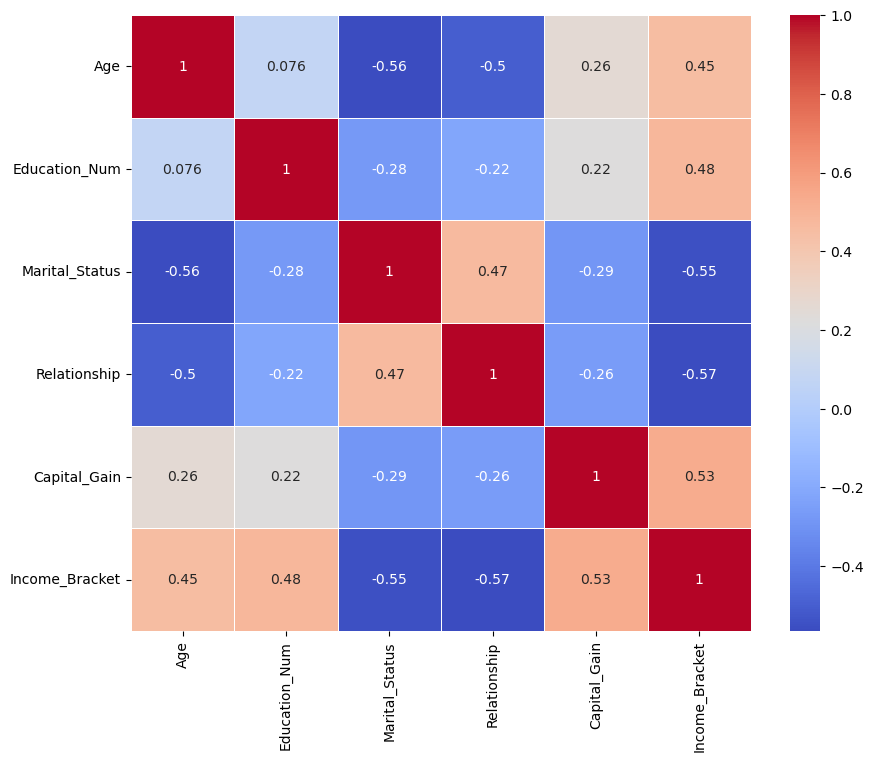

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns 


df_scaled = column_correlation[['Age', 'Education_Num', 'Marital_Status','Relationship','Capital_Gain', 'Income_Bracket']]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_scaled.corr(),annot=True,linewidths=0.7,  cmap = "coolwarm")
plt.show()

## Train test split

In [46]:
x=df.loc[:,['Age', 'Education_Num', 'Marital_Status','Relationship','Capital_Gain']]
y=df['Income_Bracket']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=13,test_size=0.3)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(22792, 5) (9769, 5) (22792,) (9769,)


In [55]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

## Model creating and evaluation

In [60]:
lr=LogisticRegression()
lr=lr.fit(xtrain,ytrain)
y_pred=lr.predict(xtest)

from sklearn.metrics import confusion_matrix

outcome=pd.DataFrame({"Actual":ytest,"Predicted":y_pred})
tn, fp, fn, tp=confusion_matrix(ytest,y_pred).ravel()

print("Recal score : ",recall_score(ytest,y_pred,average="weighted"))
print("Precision_score : ",precision_score(ytest,y_pred,average="weighted"))
print("Acuuracy_score : ",accuracy_score(ytest,y_pred))
print('f1-score:', f1_score(ytest, y_pred,average='weighted'))

Recal score :  0.8186098884225612
Precision_score :  0.8044910606443749
Acuuracy_score :  0.8186098884225612
f1-score: 0.8025602308038818


In [65]:
from sklearn.metrics import roc_auc_score
rc=roc_auc_score(ytest, lr.predict_proba(xtest)[:,1])
rc

print("ROC : %.3f" % rc)
print()
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest, y_pred)


acc = roc_auc_score(ytest, y_pred)
print('AUC: %.3f' % acc)

ROC : 0.828

AUC: 0.682


## AUC curve

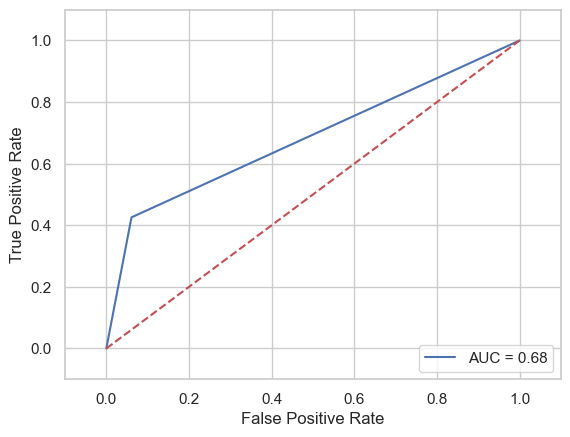

In [68]:
plt.plot(fpr, tpr, label='AUC = %0.2f'% acc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()